In [ ]:
!pip install pandas seaborn scikit-learn

# Домашнее задание 3

1. Выбрать номинальное значение как целевую переменную
2. Провести разведочный анализ **включая** анализ зависимости между номинальными переменными (chi2)
3. Выбрать `best_features`
4. Сделать нормализацию данных (scaler, onehotencoding)
4. Обучить модель логистической регрессии
5. Вывести метрики качества, описать полученный результат (также вывести коэфициенты модели)

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('student_performance.csv')
df

,student_id,weekly_self_study_hours,attendance_percentage,class_participation,total_score,grade
0,1,18.5,95.6,3.8,97.9,A
1,2,14.0,80.0,2.5,83.9,B
2,3,19.5,86.3,5.3,100.0,A
3,4,25.7,70.2,7.0,100.0,A
4,5,13.4,81.9,6.9,92.0,A
...,...,...,...,...,...,...
999995,999996,18.0,95.5,4.8,100.0,A
999996,999997,15.7,82.7,6.7,88.3,A
999997,999998,14.2,85.1,5.8,87.9,A
999998,999999,25.3,90.0,5.3,100.0,A


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   student_id               1000000 non-null  int64  
 1   weekly_self_study_hours  1000000 non-null  float64
 2   attendance_percentage    1000000 non-null  float64
 3   class_participation      1000000 non-null  float64
 4   total_score              1000000 non-null  float64
 5   grade                    1000000 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 45.8+ MB


In [ ]:
# преобразовать категориальные признаки в category
df.grade = df.grade.astype('category')

### EDA

In [ ]:
#бинаризируем часы
study_median = df['total_score'].median()
df['score_level'] = df['total_score'].apply(
    lambda x: 'high' if x > study_median else 'low'
)

In [ ]:
#бинаризируем часы
study_median = df['weekly_self_study_hours'].median()
df['study_level'] = df['weekly_self_study_hours'].apply(
    lambda x: 'high' if x > study_median else 'low'
)

In [ ]:
#бинаризируем посещаемость
attendance_median = df['attendance_percentage'].median()
df['attendance_level'] = df['attendance_percentage'].apply(
    lambda x: 'high' if x > attendance_median else 'low'
)

In [ ]:
#бинаризируем активность
participation_median = df['class_participation'].median()
df['participation_level'] = df['class_participation'].apply(
    lambda x: 'high' if x > participation_median else 'low'
)

In [ ]:
df.study_level

,study_level
0,high
1,low
2,high
3,high
4,low
...,...
999995,high
999996,high
999997,low
999998,high


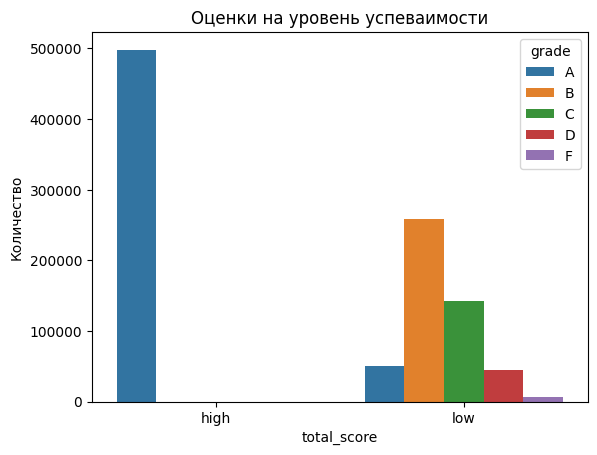

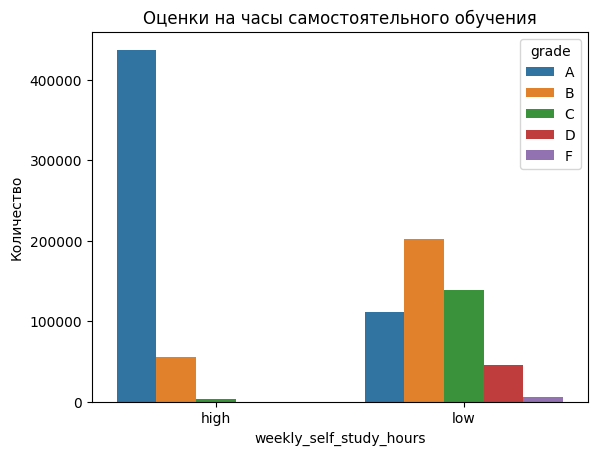

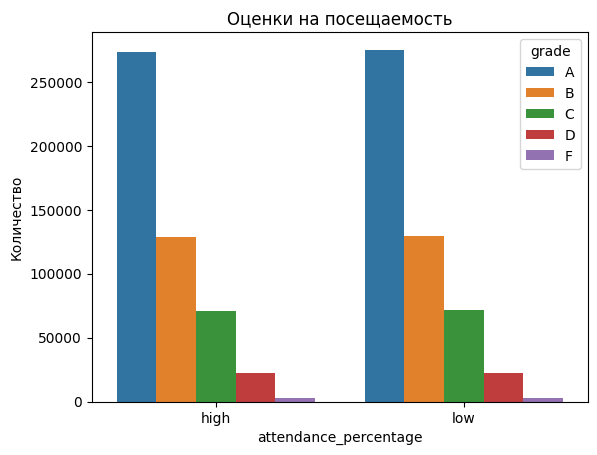

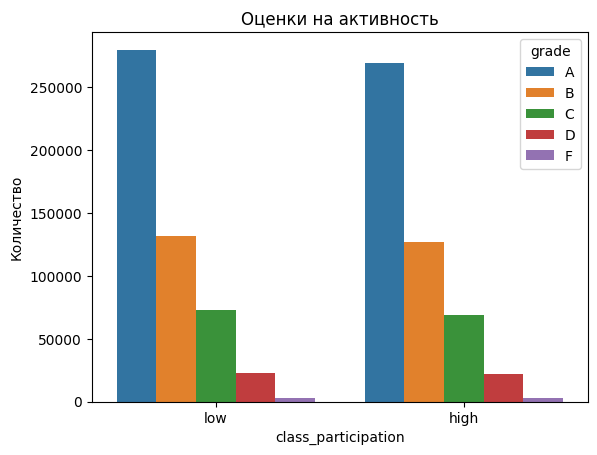

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='score_level', hue='grade')
plt.title('Оценки на уровень успеваимости')
plt.xlabel('total_score')
plt.ylabel('Количество')
plt.show()
print()
sns.countplot(data=df, x='study_level', hue='grade')
plt.title('Оценки на часы самостоятельного обучения')
plt.xlabel('weekly_self_study_hours')
plt.ylabel('Количество')
plt.show()
print()
sns.countplot(data=df, x='attendance_level', hue='grade')
plt.title('Оценки на посещаемость')
plt.xlabel('attendance_percentage')
plt.ylabel('Количество')
plt.show()
print()
sns.countplot(data=df, x='participation_level', hue='grade')
plt.title('Оценки на активность')
plt.xlabel('class_participation')
plt.ylabel('Количество')
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df['study_level'], df['grade'])
print(table)

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

grade             A       B       C      D     F
study_level                                     
high         437687   55569    3443     26     0
low          110957  202605  138537  44972  6204
χ² = 457932.30
p-value = 0.0


Зависимость есть p < 0.05

In [ ]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df['attendance_level'], df['grade'])
print(table)

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

grade                  A       B      C      D     F
attendance_level                                    
high              273539  128508  70677  22534  3177
low               275105  129666  71303  22464  3027
χ² = 6.36
p-value = 0.17364902319397432


p ≥ 0.05 → зависимость не доказана

In [ ]:
from scipy.stats import chi2_contingency
table = pd.crosstab(df['participation_level'], df['grade'])
print(table)

chi2, p, dof, expected = chi2_contingency(table)
print(f"χ² = {chi2:.2f}")
print(f"p-value = {p}")

grade                     A       B      C      D     F
participation_level                                    
high                 268828  126584  69155  22069  3087
low                  279816  131590  72825  22929  3117
χ² = 6.11
p-value = 0.19100599437134866


p ≥ 0.05 → зависимость не доказана

In [ ]:
best_features = ['study_level']

## Нормализация данных

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

le = LabelEncoder()
df['study_level_encoded'] = le.fit_transform(df['study_level'])

X = df[['study_level_encoded']]
y = df['grade']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
best_features = ['study_level_encoded']

Проверка кодировки:
high = 0
low = 1

Распределение в данных:
study_level_encoded
1    503275
0    496725
Name: count, dtype: int64


### Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y = df['grade']
X = df[best_features]

In [ ]:
model = LogisticRegression(
    penalty=None, # регуляризация (добавление штрафа за большие коэфициенты)
    random_state=42,
)

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression(penalty=None, random_state=42)

In [ ]:
y_pred = model.predict(X_test_scaled)
y_pred

array(['A', 'B', 'A', ..., 'A', 'B', 'A'], dtype=object)

In [ ]:
y_pred_proba = model.predict_proba(X_test_scaled)
y_pred_proba

array([[8.81086927e-01, 1.11966589e-01, 6.89219069e-03, 2.79423333e-05,
        2.63508811e-05],
       [2.20494248e-01, 4.02494826e-01, 2.75310102e-01, 8.93657258e-02,
        1.23350980e-02],
       [8.81086927e-01, 1.11966589e-01, 6.89219069e-03, 2.79423333e-05,
        2.63508811e-05],
       ...,
       [8.81086927e-01, 1.11966589e-01, 6.89219069e-03, 2.79423333e-05,
        2.63508811e-05],
       [2.20494248e-01, 4.02494826e-01, 2.75310102e-01, 8.93657258e-02,
        1.23350980e-02],
       [8.81086927e-01, 1.11966589e-01, 6.89219069e-03, 2.79423333e-05,
        2.63508811e-05]])

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix
)
import numpy as np

def evaluate_classification(y_true, y_pred, y_proba=None):

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)

    # ROC-AUC (если переданы вероятности)
    roc_auc = None
    if y_proba is not None:
        # Если многоклассовая классификация — One-vs-Rest
        classes = np.unique(y_true)
        y_true_onehot = np.eye(len(classes))[np.searchsorted(classes, y_true)]
        roc_auc = roc_auc_score(y_true_onehot, y_proba, multi_class='ovr')

    cm = confusion_matrix(y_true, y_pred)

    print("=== Метрики классификации ===")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:   {roc_auc:.4f}")
    print("\nConfusion Matrix:")
    print(cm)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm
    }


In [ ]:
metrics = evaluate_classification(y_test, y_pred, y_pred_proba)

=== Метрики классификации ===
Accuracy:  0.6405
Precision: 0.5875
Recall:    0.6405
F1-score:  0.5969
ROC-AUC:   0.7617

Confusion Matrix:
[[131322  33271      0      0      0]
 [ 16636  60816      0      0      0]
 [  1048  41546      0      0      0]
 [     9  13491      0      0      0]
 [     0   1861      0      0      0]]


Accuracy (Доля правильно классифицированных объектов.) - 64%

Precision (Какой процент предсказанных положительных действительно положительные.) - 59%

Recall (Какую долю настоящих положительных модель нашла.) - 64%

F1-score (Баланс между точностью и полнотой.
   Ближе к 1 → модель сбалансирована, ближе к 0 → проблемы с FP или FN.) - 0.5969

ROC-AUC (Измеряет **способность модели различать классы**, независимо от выбранного порога вероятности.) - 0.7617

In [ ]:
model.coef_

array([[-2.47266522],
       [-1.14031054],
       [ 0.06367739],
       [ 2.25505075],
       [ 1.29424762]])

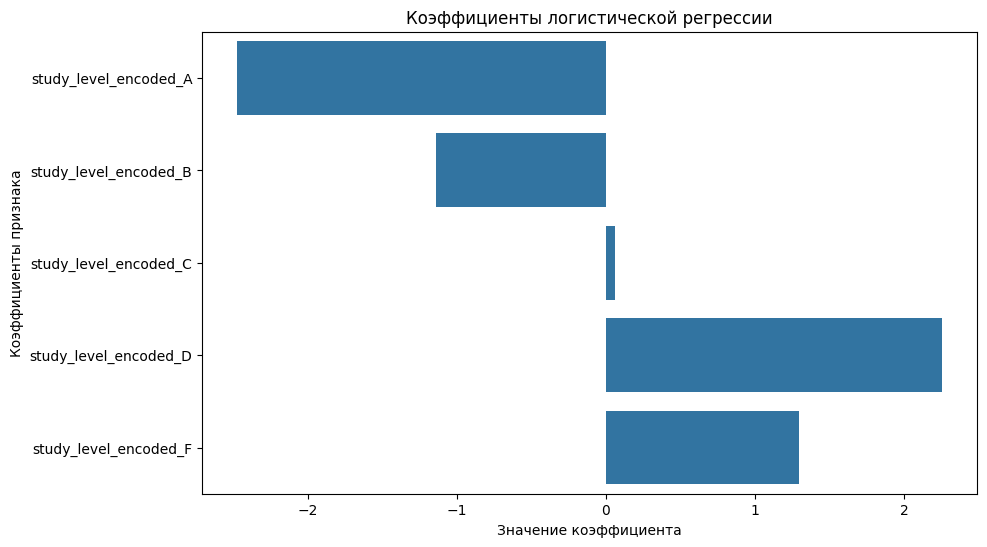

In [ ]:
plt.figure(figsize=(10, 6))
y_labels = [f"{X.columns[0]}_{grade}" for grade in ['A', 'B', 'C', 'D', 'F']]
sns.barplot(x=model.coef_.flatten(), y=y_labels, orient="h")
plt.xlabel("Значение коэффициента")
plt.ylabel("Коэффициенты признака")
plt.title("Коэффициенты логистической регрессии")
plt.show()